# Assignment 2

# Part 1: Image segmentation

## Question 1: Color clustering with K-means (15 points)

Image segmentation is the process of partitioning an image into various regions of pixels that are more meaningful and easier to understand/analyze. It is often used to specify boundaries and separate the most important object(s) from the rest. One way to segment images is to use K-means clustering to cluster image regions with similar colors. Remember that K-means clustering is an unsupervised algorithm that partitions the given data into K clusters based on some definition of similarity.

**Do this**:

1-a. Implement the K-means clustering algorithm in `kmeans.py`. (10 points)

1-b. Experiment with different values of K. Discuss which value of K seems to be the best for each of the test images. (5 points)

In [1]:
import cv2, pickle
import matplotlib.pyplot as plt
import numpy as np

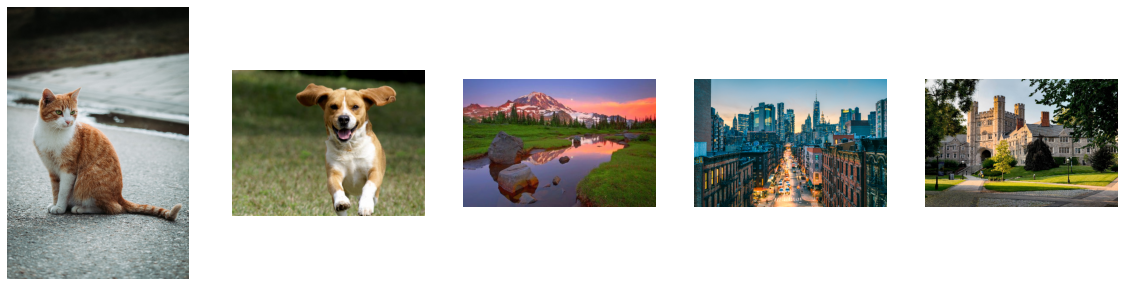

In [2]:
# Here are images you will use to check your implementation.
filenames = ['cat.jpeg', 'dog.jpeg',  'nature.jpeg', 'nyc.jpeg', 'princeton.jpeg']

plt.figure(figsize=(4*len(filenames), 5))
for i in range(len(filenames)):
    img = cv2.imread(filenames[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, nchannel = img.shape
    scale = 500/max(height, width) # The longer side will be resized to 500
    img = cv2.resize(img, (int(width*scale), int(height*scale)))
    plt.subplot(1, len(filenames), i+1)
    plt.imshow(img); plt.axis('off')
plt.show()

### 1-a. Implement the K-means clustering algorithm in `kmeans.py` (10 points)

After implementing the K-means clustering algorithm in `kmeans.py`, use the below code to segment a given image into regions with similar colors.

In [3]:
# Import your implementation
from kmeans import kmeans

In [4]:
def run_kmeans(K, niter, filename):
    
    # Load and transform an image
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, nchannel = img.shape
    scale = 500/max(height, width) # The longer side will be resized to 500
    img = cv2.resize(img, (int(width*scale), int(height*scale)))

    # Vectorize the image
    x = img.reshape((-1, 3)).astype(np.float32)

    # Run K-means clustering
    labels, centroids = kmeans(x, K, niter)
    
    # Produce the resulting image segmentation. 
    centroids = np.uint8(centroids)
    labels = np.int8(labels)
    result = centroids[labels.flatten()]
    result_image = result.reshape((img.shape))

    # Visualize the original image and the segmentation.
    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.imshow(img); plt.title('Original Image'); plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(result_image); plt.title('Segmented Image (K={})'.format(K)); plt.axis('off')
    plt.show()

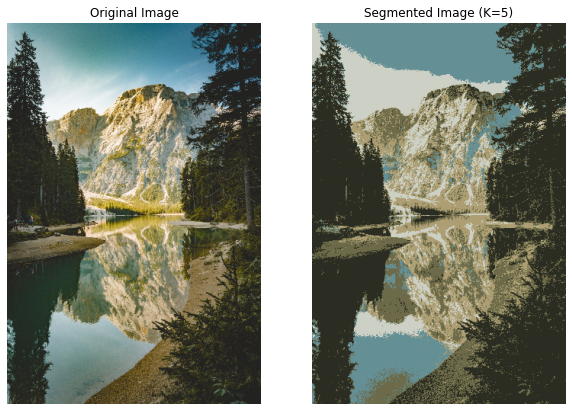

In [9]:
# Define the arguments
K = 5
niter = 20
filename = 'example.jpeg'

# Run K-means
run_kmeans(K, niter, filename)

### b) Experiment with different values of K. Discuss which value of K seems to be the best for each of the test images. (5 points)

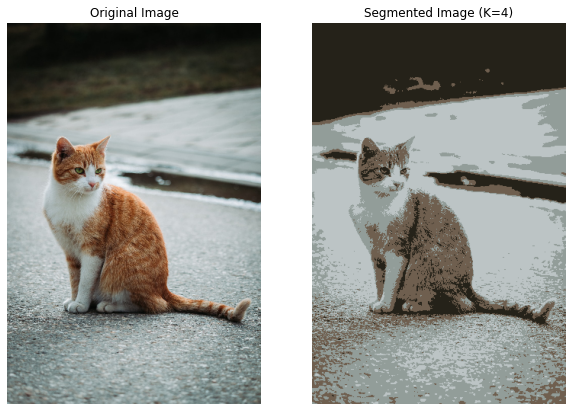

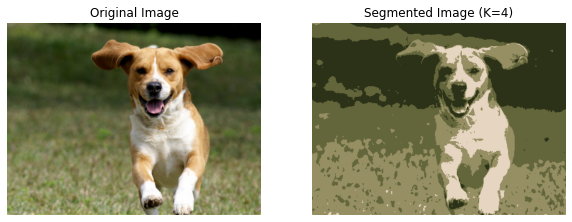

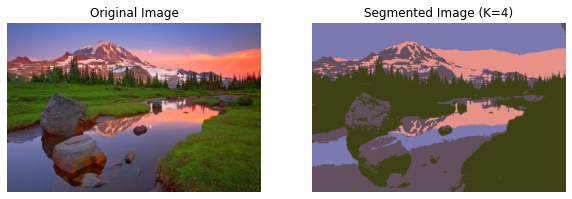

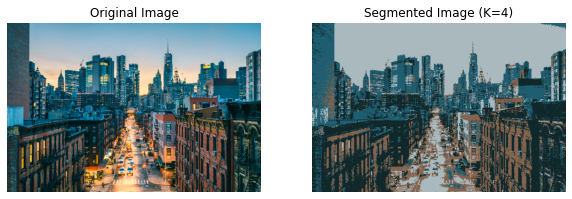

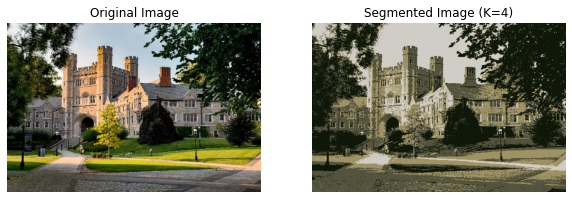

In [18]:
# Define the arguments
K = 4
niter = 20

# Run K-means
for i in range(len(filenames)):
    run_kmeans(K, niter, filenames[i])

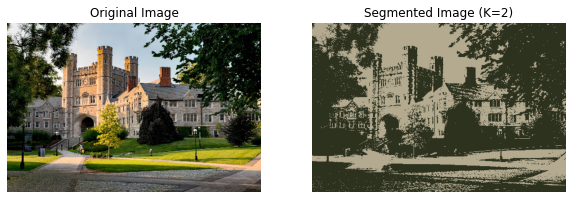

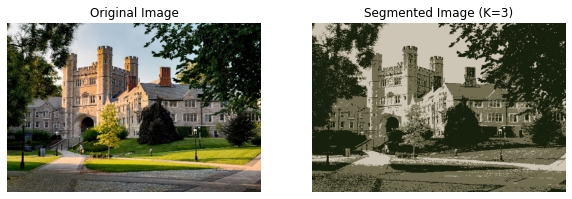

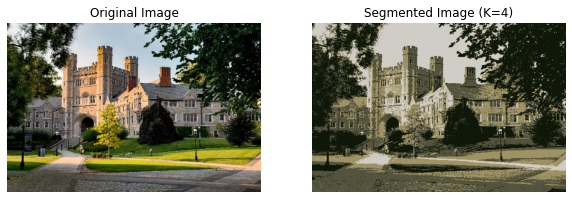

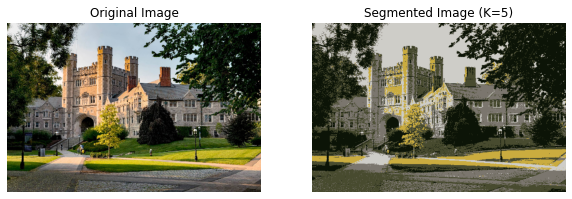

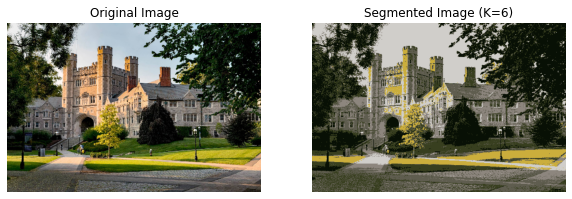

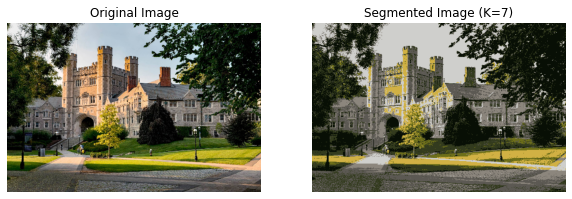

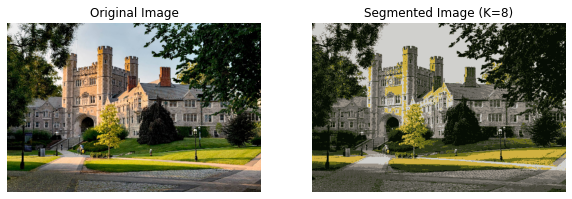

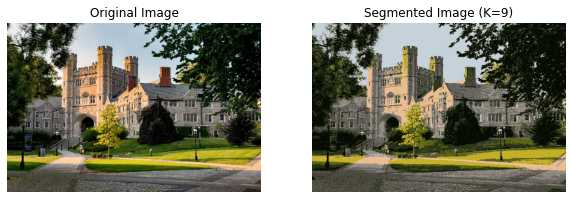

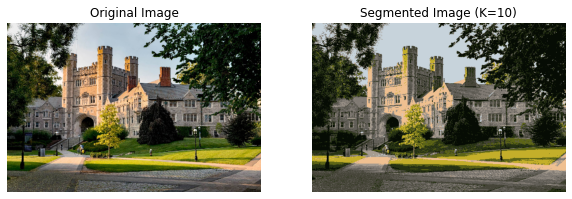

In [33]:
# Define the arguments
K = 4
niter = 20

# Run K-means
for i in range(2, 11):
    run_kmeans(i, niter, 'princeton.jpeg')

### Answers to 1b
For the cat, k = 3 works best because starting from k = 4, the black region up top starts to get segmented into two with one of the two regions being lighter which isn't a good representation of the region at the top. Moreover, k = 3 is enough to capture the details and difference in color on the cat and it represents the ground well enough.
For the dog, k = 6 works best because it correctly captures the different gradients in the grass and the black region at the top. It also takes into account the different colors of the dog.
For the nature image, k = 5 works best because it segments the sky properly and segments the forest and grass immediately in front properly. It also has the outline of the rocks and mountain. k = 4 has the grass and forest blended and k = 6 and up starts to segment the sky too much s.t. it doesn't work
For NYC, k = 4 works best because starting from k = 5, we start to get brighter yellow tones which causes the sky to be segmented into two regions but it represents the gradient in the original sky badly. Moreover, even in k = 4, there is already a muted yellow which is sufficient to segment the street lights and lighted building walls, and the city is segmented well from the street below.
For Princeton, k = 5 works best because we start getting the green tones. So, the one tree in the middle is no longer muted and looks very similar in color to the original image. We also get the lighted region of the building, a good segmentation of the other greenery and the sky and building, and finally the ground shadows and lightings are captured.